## Risk Segmentation and Analysis

Pada project ini dilakukan credit risk segmentation mengunakan model clustering atau model unsupervised learning. Credit risk merupakan suatu risiko kerugian yang disebabkan oleh ketidak mampuan dari debitur atas kewajiban pembayaran utangnya baik utang pokok maupun bunganya ataupun keduanya. 

sebagai contoh Bank Sinarmas memberikan kredit perumahan kepada debitur perorangan.  Saat memberikan kredit tersebut, bank memiliki risiko bahwa sebagian atau seluruh debitur perorangan tersebut akan gagal membayar bunga ataupun pokok kredit yang diterimanya. Risiko kredit timbul dari adanya kemungkinan bahwa kredit yang diberikan oleh bank, atau obligasi yang dibeli, tidak dapat dibayarkan kembali. Risiko kredit juga timbul dari tidak dipenuhinya berbagai bentuk kewajiban pihak lain kepada bank, seperti kegagalan memenuhi kewajiban pembayaran dalam kontrak derivatif. Untuk sebagian bank, risiko kredit merupakan risiko terbesar yang dihadapi. Pada umumnya, marjin yang diperhitungkan untuk mengantisipasi risiko kredit hanyalah merupakan bagian kecil dari total kredit yang diberikan bank dan oleh karenanya kerugian pada kredit dapat menghancurkan modal bank dalam waktu singkat.

Bank menggunakan sejumlah teknik dan kebijakan dalam mengelola risiko kredit untuk meminimalkan kemungkinan terjadinya atau dampak dari kerugian kredit (dikenal dengan mitigasi risiko kredit). Teknik dan kebijakan tersebut adalah:
1. model pemeringkatan (grading model) untuk kredit perorangan
2. manajemen portofolio kredit
3. sekuritisasi
4. agunan
5. pengawasan arus kas
6. manajemen pemulihan (recovery management).

Pada project ini akan dilakukan pembuatan model credit risk segementation untuk memberikan grade atau label kepada customer sehingga pihak perusahan dapat menolak permintaan kredit customer untuk customer yang diberikan label bad risk. Dengan demikian, pihak perusahaan tidak mengalami kerugian atau dapat mengurangi jumlah customer yang tidak dapat membayar cicilan atau tagihan kredit. Dengan kata lain, Kredit yang diberikan bank setiap saat dapat menjadi bermasalah, namun kemungkinannya menjadi kecil jika bank menerapkan kebijakan pemberian kredit yang sehat.  Langkah pertama adalah menciptakan model pemeringkatan kredit sebagai sarana untuk menetapkan kemungkinan terjadinya gagal bayar (default).  Dalam hal ini bank melakukan kalibrasi risiko yang pada gilirannya akan memungkinkan bank untuk menetapkan suatu probabilitas tertentu untuk setiap kejadian yang tidak diinginkan (yang dikenal dengan probability of default/PD).  Cara ini memungkinkan bank untuk memastikan bahwa portofolio kredit bank tidak terkonsentrasi pada kredit berkualitas buruk yang memiliki kemungkinan gagal bayar yang tinggi.


## Introduction

Name        : Josua Yerico H S

email       : ricjosua@gmail.com

University  : Institut Teknologi Bandung (ITB)



## Working Area

## **Import Libaries**

In [1]:
# Define libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib as mpl
from statsmodels.graphics.gofplots import qqplot
from sklearn.datasets import make_blobs

# Split between Train-Set and Test-Set
from sklearn.model_selection import train_test_split

#for feature scalling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

#for Reduction Dimension
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

#Handling outlier
from feature_engine.outliers import Winsorizer

#For Classification Problem
from sklearn.cluster import KMeans


# Evaluate clasification Models
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn import metrics
from scipy.spatial.distance import cdist

#for correlation test with heatmap method
import phik
from statsmodels.stats.outliers_influence import variance_inflation_factor

Berikut dataset yang digunakan dalam project risk segmentation and analysis:

In [2]:
# Load Dataset to notebook
data = pd.read_csv('IndonesiaCreditData.csv - Dataset.csv')
data

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV


In [3]:
#Duplicate dataframe
data_copy = data.copy()

In [4]:
data.head()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,14494431,6,radio/TV
1,1,22,female,2,own,little,moderate,73786449,48,radio/TV
2,2,49,male,1,own,little,NaN,25988304,12,education
3,3,45,male,2,free,little,little,97728918,42,furniture/equipment
4,4,53,male,2,free,little,little,60383130,24,car


In [5]:
data.tail()

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,21524664,12,furniture/equipment
996,996,40,male,3,own,little,little,47822943,30,car
997,997,38,male,2,own,little,NaN,9968796,12,radio/TV
998,998,23,male,2,free,little,little,22876155,45,radio/TV
999,999,27,male,2,own,moderate,moderate,56737824,45,car


In [6]:
#Check 1: check data type and mising value in dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   No                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


## **Data Preprocessing**

Pada bagian ini dilakukan pembersihan data, feature scaling, feature encoding, dan reduksi dimensi yang bertujuan untuk memudahkan dalam pembuatan model clustering untuk risk segmentation.

In [7]:
data_new = data.dropna()
data_new.reset_index(drop=True)

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,1,22,female,2,own,little,moderate,73786449,48,radio/TV
1,3,45,male,2,free,little,little,97728918,42,furniture/equipment
2,4,53,male,2,free,little,little,60383130,24,car
3,7,35,male,3,rent,little,moderate,86148252,36,car
4,9,28,male,3,own,little,moderate,64896366,30,car
...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,21611457,24,radio/TV
518,993,30,male,3,own,little,little,49087641,36,furniture/equipment
519,996,40,male,3,own,little,little,47822943,30,car
520,998,23,male,2,free,little,little,22876155,45,radio/TV


In [8]:
data_new.describe()

,No,Age,Job,Credit amount,Duration
count,522.000000,522.000000,522.000000,5.220000e+02,522.000000
mean,493.522989,34.888889,1.875479,4.065316e+07,21.339080
std,291.131014,11.787918,0.682811,3.631860e+07,12.474079
min,1.000000,19.000000,0.000000,3.422124e+06,6.000000
25%,233.500000,26.000000,2.000000,1.608770e+07,12.000000
50%,502.500000,31.500000,2.000000,2.884627e+07,18.000000
75%,736.750000,41.000000,2.000000,4.923953e+07,26.750000
max,999.000000,75.000000,3.000000,2.284392e+08,72.000000


In [9]:
data_final = data_new.copy()

In [10]:
# Get Numerical Columns and Categorical Columns

num_columns = data_final.select_dtypes(include=np.number).columns.tolist() 
cat_columns = data_final.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['No', 'Age', 'Job', 'Credit amount', 'Duration']
Categorical Columns :  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


In [11]:
data_num = data_final[num_columns]
data_cat= data_final[cat_columns]

## **Feature Scaling**

In [12]:
# Feature Scaling using minmaxScaler

scaler = MinMaxScaler()
scaler.fit(data_num)

data_num_scaled = scaler.transform(data_num)

## **Feature Encoding**

In [13]:
# Feature Encoding using Ordinal Enconder
encoder = OrdinalEncoder()

encoder.fit_transform(data_cat)

data_cat_encoded = encoder.transform(data_cat)

In [14]:
# Concat columns
data_fix = np.concatenate([data_num_scaled, data_cat_encoded], axis=1)


# Create DataFrame of `X_train_final`
data_fix_df = pd.DataFrame(data_fix, columns=[num_columns+cat_columns])


## **Reduction Dimension with PCA**

In [15]:
pca_2d_scaled = PCA(n_components=10).fit(data_fix_df)

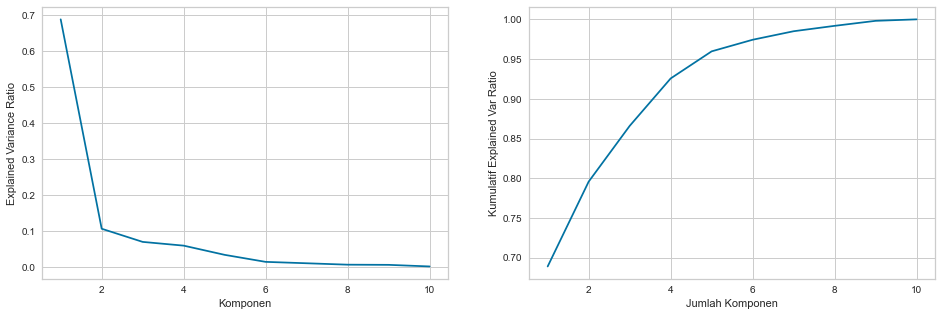

In [16]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,11),pca_2d_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,11),np.cumsum(pca_2d_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()

In [17]:
pca_2d = PCA(n_components=9).fit(data_fix_df)
twod_data = pca_2d.transform(data_fix_df)
twod_data_ok = pd.DataFrame(twod_data).reset_index(drop=True)

In [18]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(twod_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Wi

[3005.99113429833,
 1189.1142914594013,
 1049.0386492747837,
 910.78872378796,
 809.439339964948,
 737.0171563314661,
 700.3707671196885,
 645.0509540202816,
 602.5090288983388]

## Modeling

## **Penentuan Nilai K/Penentuan Jumlah cluster**

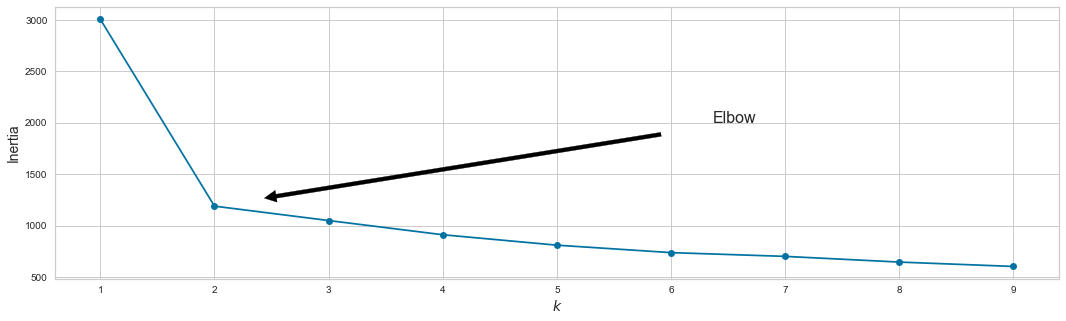

In [19]:
plt.figure(figsize=(18, 5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
  
plt.show()

In [20]:
silhouette_scores = [silhouette_score(twod_data, model.labels_)
                     for model in kmeans_per_k[1:]]

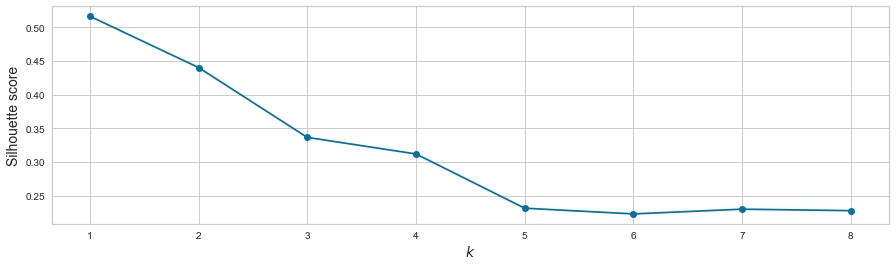

In [21]:
plt.figure(figsize=(15, 4))
plt.plot(range(1, 9), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

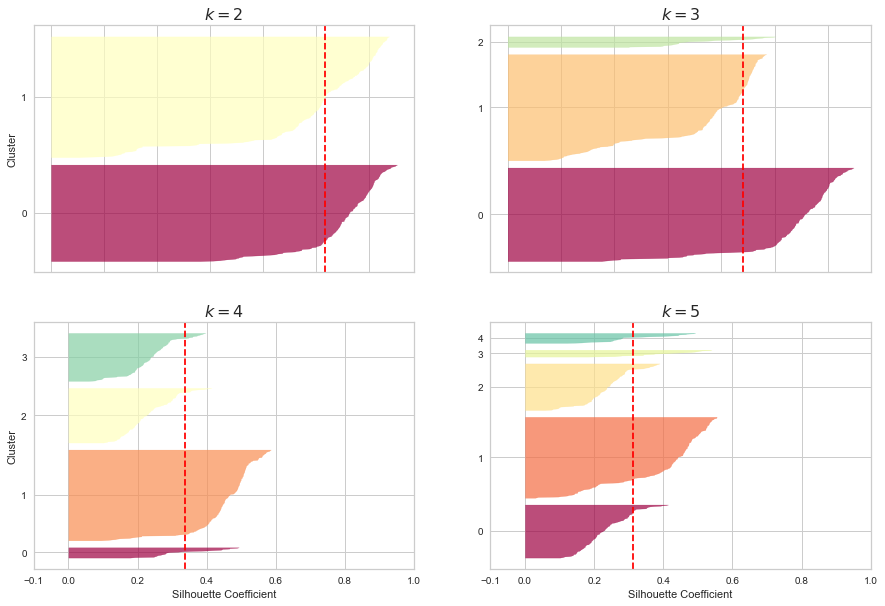

In [22]:
plt.figure(figsize=(15, 10))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(twod_data, y_pred)

    padding = len(twod_data) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

## **Model Definition & Model Training**

c:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


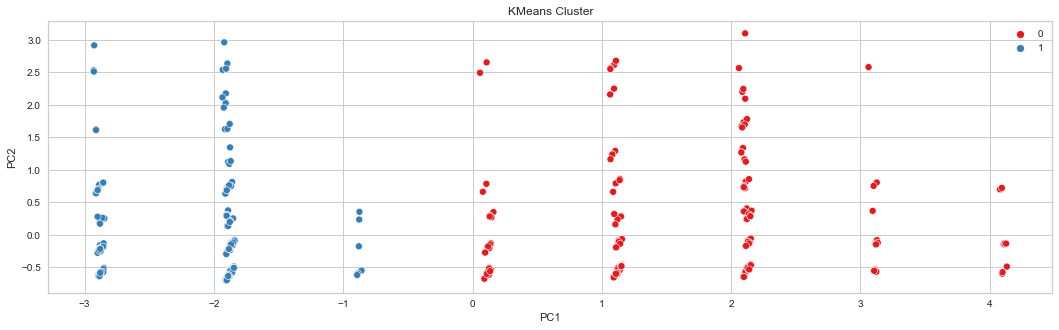

In [23]:
kmeans_new = KMeans(n_clusters=2, init='random', n_init=1, random_state=42)
kmeans_new.fit(twod_data)

plt.figure(figsize=(18,5))
sns.scatterplot(x=twod_data[:, 0], y=twod_data[:, 1], hue=kmeans_new.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Cluster')
plt.show()

## **Model Evaluation**

In [46]:
y_pred_kmeans = kmeans_new.predict(twod_data)
y_pred_df = pd.DataFrame(y_pred_kmeans, columns=['Credit Risk'])

data_label1 = pd.concat([y_pred_df, data_new.reset_index(drop=True)], axis=1)
data_label1

,Credit Risk,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,1,22,female,2,own,little,moderate,73786449,48,radio/TV
1,0,3,45,male,2,free,little,little,97728918,42,furniture/equipment
2,1,4,53,male,2,free,little,little,60383130,24,car
3,1,7,35,male,3,rent,little,moderate,86148252,36,car
4,1,9,28,male,3,own,little,moderate,64896366,30,car
...,...,...,...,...,...,...,...,...,...,...,...
517,0,989,48,male,1,own,little,moderate,21611457,24,radio/TV
518,0,993,30,male,3,own,little,little,49087641,36,furniture/equipment
519,1,996,40,male,3,own,little,little,47822943,30,car
520,0,998,23,male,2,free,little,little,22876155,45,radio/TV


In [47]:
data_cluster_1 = data_label1[data_label1['Credit Risk'] == 1].reset_index(drop=True)
data_cluster_1

,Credit Risk,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,1,4,53,male,2,free,little,little,60383130,24,car
1,1,7,35,male,3,rent,little,moderate,86148252,36,car
2,1,9,28,male,3,own,little,moderate,64896366,30,car
3,1,10,25,female,2,rent,little,moderate,16056705,12,car
4,1,11,24,female,2,rent,little,little,53414892,48,business
...,...,...,...,...,...,...,...,...,...,...,...
227,1,983,26,male,2,own,little,little,102031371,36,car
228,1,986,33,male,2,own,little,rich,77977311,42,business
229,1,988,29,male,3,free,little,little,81573021,24,car
230,1,996,40,male,3,own,little,little,47822943,30,car


In [32]:
data_cluster_1.describe()

,Risk Score,No,Age,Job,Credit amount,Duration
count,232.0,232.000000,232.000000,232.000000,2.320000e+02,232.000000
mean,1.0,491.991379,36.443966,1.896552,4.593691e+07,22.155172
std,0.0,302.578014,12.130116,0.731236,4.010855e+07,13.079579
min,1.0,4.000000,20.000000,0.000000,3.422124e+06,6.000000
25%,1.0,206.500000,27.000000,2.000000,1.646897e+07,12.000000
50%,1.0,505.000000,34.000000,2.000000,3.166085e+07,18.000000
75%,1.0,748.000000,42.000000,2.000000,6.013205e+07,28.500000
max,1.0,999.000000,75.000000,3.000000,1.977021e+08,60.000000


In [33]:
data_cluster_1['Purpose'].unique()

array(['car', 'business', 'domestic appliances'], dtype=object)

In [34]:
data_cluster_1['Saving accounts'].unique()

array(['little', 'moderate', 'rich', 'quite rich'], dtype=object)

In [48]:
data_cluster_0 = data_label1[data_label1['Credit Risk'] == 0].reset_index(drop=True)
data_cluster_0

,Credit Risk,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,1,22,female,2,own,little,moderate,73786449,48,radio/TV
1,0,3,45,male,2,free,little,little,97728918,42,furniture/equipment
2,0,12,22,female,2,own,little,moderate,19429233,12,radio/TV
3,0,15,32,female,1,own,moderate,little,15895518,24,radio/TV
4,0,21,44,male,2,rent,quite rich,little,32820153,6,radio/TV
...,...,...,...,...,...,...,...,...,...,...,...
285,0,980,49,male,2,own,little,moderate,103978014,30,furniture/equipment
286,0,985,25,female,2,rent,little,little,17767767,15,furniture/equipment
287,0,989,48,male,1,own,little,moderate,21611457,24,radio/TV
288,0,993,30,male,3,own,little,little,49087641,36,furniture/equipment


In [36]:
data_cluster_0.describe()

,Risk Score,No,Age,Job,Credit amount,Duration
count,290.0,290.000000,290.000000,290.000000,2.900000e+02,290.000000
mean,0.0,494.748276,33.644828,1.858621,3.642617e+07,20.686207
std,0.0,282.161140,11.375384,0.642237,3.243053e+07,11.950365
min,0.0,1.000000,19.000000,0.000000,4.190862e+06,6.000000
25%,0.0,257.750000,25.000000,1.250000,1.591412e+07,12.000000
50%,0.0,500.000000,30.000000,2.000000,2.764977e+07,18.000000
75%,0.0,720.750000,40.000000,2.000000,4.445971e+07,24.000000
max,0.0,998.000000,67.000000,3.000000,2.284392e+08,72.000000


In [37]:
data_cluster_0['Purpose'].unique()

array(['radio/TV', 'furniture/equipment', 'repairs', 'vacation/others',
       'education'], dtype=object)

## **Exploratory Data Analysis (EDA)**

*Grafik 1 - Grafik Credit Amount terhadap Risk Score 0 dan 1*

In [44]:
import plotly.offline as py 
import plotly.figure_factory as ff

plt.figure(figsize = (12,14))

# Add histogram data
x1 = np.log(data_cluster_0['Credit amount']) 
x2 = np.log(data_cluster_1["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Label 0', 'Label 1']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

<Figure size 864x1008 with 0 Axes>

*Grafik 2 - Grafik Durasi terhadap Risk Score 0 dan 1*

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



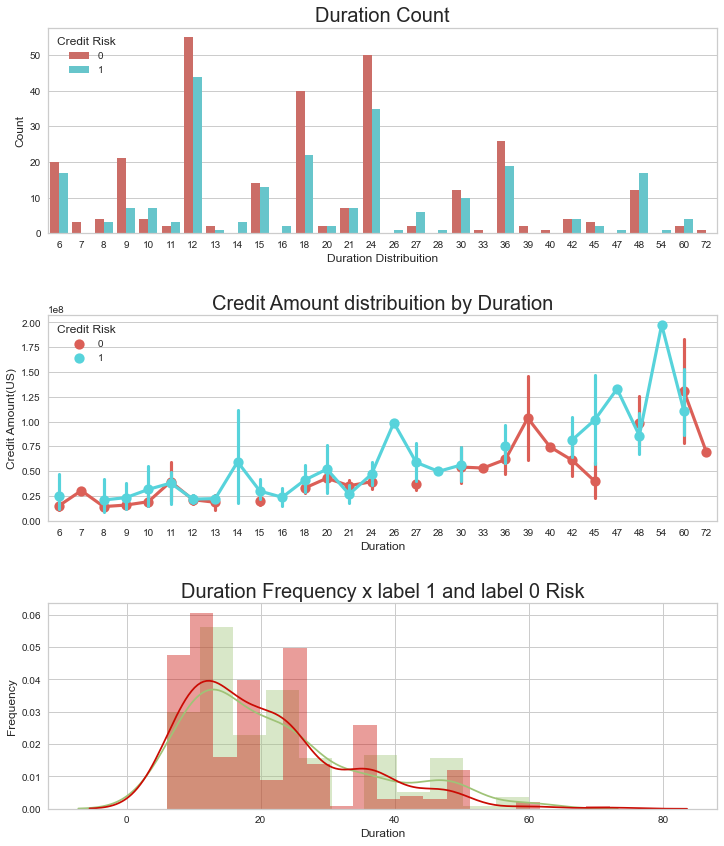

In [49]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Duration", data=data_label1, 
              palette="hls",  hue = "Credit Risk")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Duration", y ="Credit amount",data=data_label1,
                   hue="Credit Risk", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount(US)", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(data_cluster_1["Duration"], color='g')
g2 = sns.distplot(data_cluster_0["Duration"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x label 1 and label 0 Risk", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

*Grafik 3 - Grafik purposes terhadap Risk Score 0 dan 1*

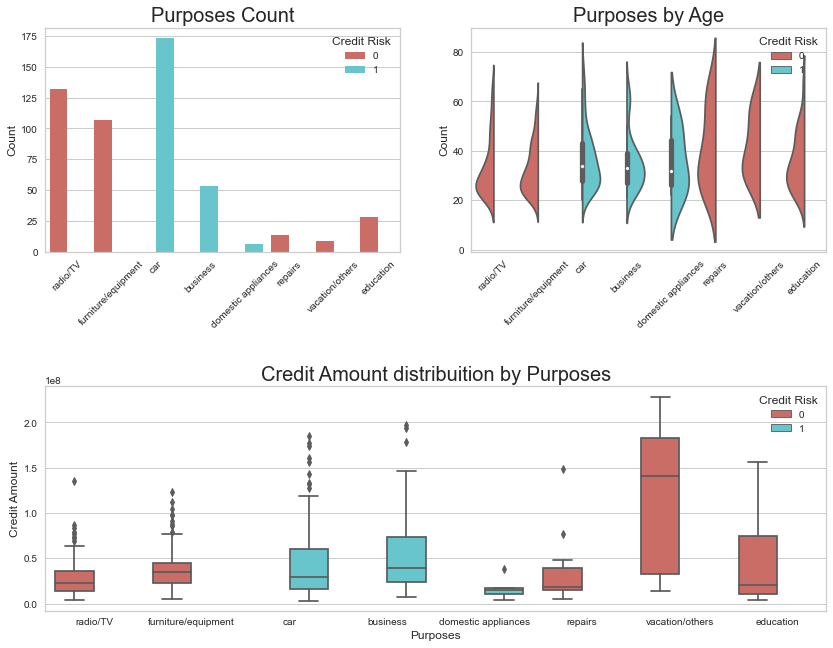

In [50]:
plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=data_label1, 
              palette="hls", hue = "Credit Risk")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Age", data=data_label1, 
                    palette="hls", hue = "Credit Risk",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Credit amount", data=data_label1, 
               palette="hls", hue = "Credit Risk")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

*Grafik 4 - Grafik Saving Accounts terhadap Risk Score 0 dan 1*

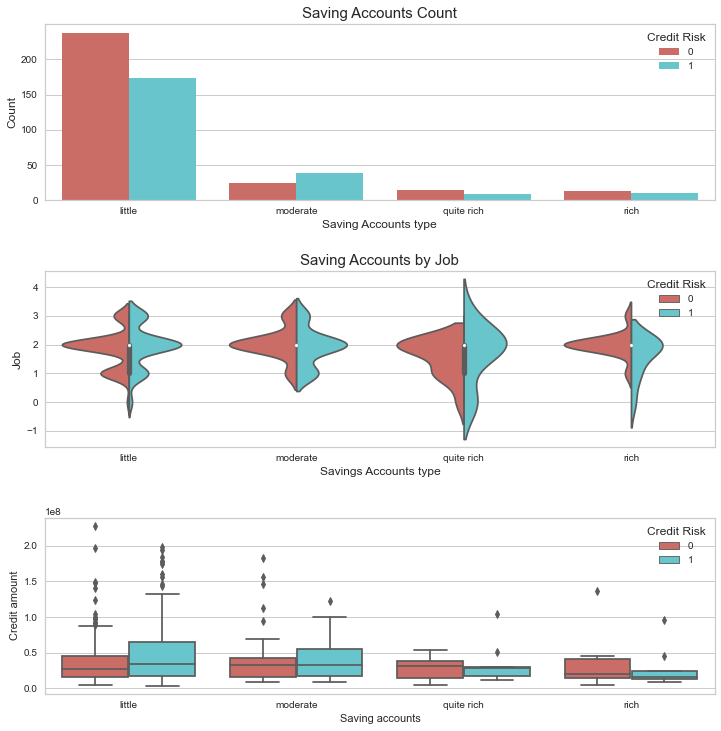

In [51]:
fig, ax = plt.subplots(3,1, figsize=(12,12))
g = sns.countplot(x="Saving accounts", data=data_label1, palette="hls", 
              ax=ax[0],hue="Credit Risk")
g.set_title("Saving Accounts Count", fontsize=15)
g.set_xlabel("Saving Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)

g1 = sns.violinplot(x="Saving accounts", y="Job", data=data_label1, palette="hls", 
               hue = "Credit Risk", ax=ax[1],split=True)
g1.set_title("Saving Accounts by Job", fontsize=15)
g1.set_xlabel("Savings Accounts type", fontsize=12)
g1.set_ylabel("Job", fontsize=12)

g = sns.boxplot(x="Saving accounts", y="Credit amount", data=data_label1, ax=ax[2],
            hue = "Credit Risk",palette="hls")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount(US)", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

*Grafik 5 - Grafik Housing, Job terhadap Risk Score 0 dan 1*

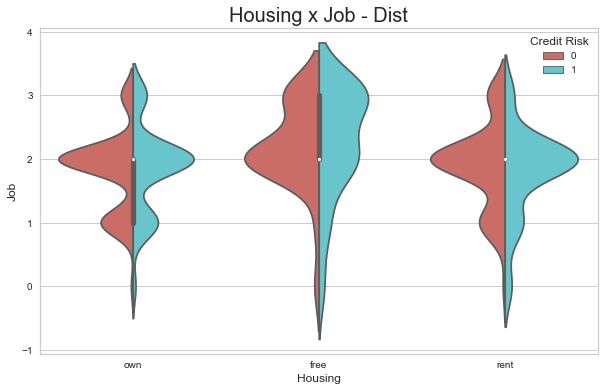

In [52]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Job",data=data_label1,
                   hue="Credit Risk", palette="hls",split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Job", fontsize=12)
g.set_title("Housing x Job - Dist", fontsize=20)

plt.show()

## **Conclusion and Overall Analysis**

Pada project ini dilakukan credit risk segmentation mengunakan model clustering atau model unsupervised learning. Credit risk merupakan suatu risiko kerugian yang disebabkan oleh ketidak mampuan dari debitur atas kewajiban pembayaran utangnya baik utang pokok maupun bunganya ataupun keduanya. 

sebagai contoh Bank Sinarmas memberikan kredit perumahan kepada debitur perorangan.  Saat memberikan kredit tersebut, bank memiliki risiko bahwa sebagian atau seluruh debitur perorangan tersebut akan gagal membayar bunga ataupun pokok kredit yang diterimanya. Risiko kredit timbul dari adanya kemungkinan bahwa kredit yang diberikan oleh bank, atau obligasi yang dibeli, tidak dapat dibayarkan kembali. Risiko kredit juga timbul dari tidak dipenuhinya berbagai bentuk kewajiban pihak lain kepada bank, seperti kegagalan memenuhi kewajiban pembayaran dalam kontrak derivatif. Untuk sebagian bank, risiko kredit merupakan risiko terbesar yang dihadapi. Pada umumnya, marjin yang diperhitungkan untuk mengantisipasi risiko kredit hanyalah merupakan bagian kecil dari total kredit yang diberikan bank dan oleh karenanya kerugian pada kredit dapat menghancurkan modal bank dalam waktu singkat.

Bank menggunakan sejumlah teknik dan kebijakan dalam mengelola risiko kredit untuk meminimalkan kemungkinan terjadinya atau dampak dari kerugian kredit (dikenal dengan mitigasi risiko kredit). Teknik dan kebijakan tersebut adalah:
1. model pemeringkatan (grading model) untuk kredit perorangan
2. manajemen portofolio kredit
3. sekuritisasi
4. agunan
5. pengawasan arus kas
6. manajemen pemulihan (recovery management).

Pada project ini akan dilakukan pembuatan model credit risk segementation untuk memberikan grade atau label kepada customer sehingga pihak perusahan dapat menolak permintaan kredit customer untuk customer yang diberikan label bad risk. Dengan demikian, pihak perusahaan tidak mengalami kerugian atau dapat mengurangi jumlah customer yang tidak dapat membayar cicilan atau tagihan kredit. Dengan kata lain, Kredit yang diberikan bank setiap saat dapat menjadi bermasalah, namun kemungkinannya menjadi kecil jika bank menerapkan kebijakan pemberian kredit yang sehat.  Langkah pertama adalah menciptakan model pemeringkatan kredit sebagai sarana untuk menetapkan kemungkinan terjadinya gagal bayar (default).  Dalam hal ini bank melakukan kalibrasi risiko yang pada gilirannya akan memungkinkan bank untuk menetapkan suatu probabilitas tertentu untuk setiap kejadian yang tidak diinginkan (yang dikenal dengan probability of default/PD).  Cara ini memungkinkan bank untuk memastikan bahwa portofolio kredit bank tidak terkonsentrasi pada kredit berkualitas buruk yang memiliki kemungkinan gagal bayar yang tinggi.

Model yang digunakan dalam memberikan scoring atau grading adalah  model K-means clustering. Model K-means merupakan algoritme untuk membagi n pengamatan menjadi k kelompok sedemikian hingga tiap pengamatan termasuk ke dalam kelompok dengan rata-rata terdekat. Hasilnya adalah pembagian pengamatan ke dalam sel-sel Voronoi. Pengklasteran k-means meminimalkan ragam dalam klaster. Dalam pembuatan model kmeans, terlebih dahulu dilakukan penentuan nilai k atau jumlah cluster untuk credit risk segmentation. Dalam penentuan nilai k yang efektif digunakan metode elbow dan silhoutte score.

Berikut Grafik dari metode elbow:

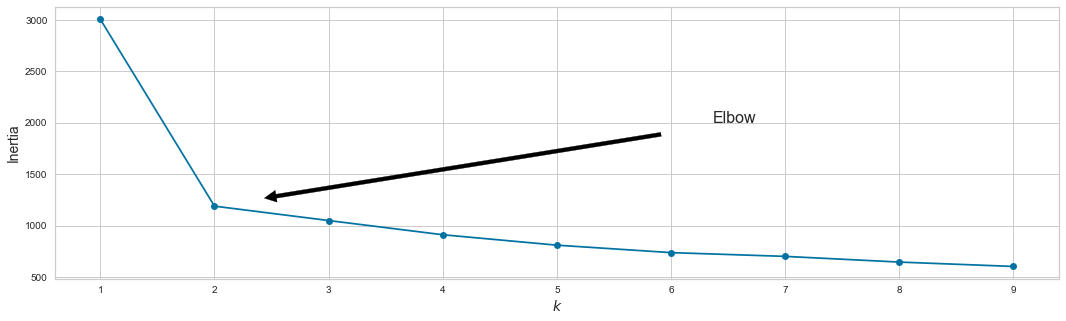

In [53]:
plt.figure(figsize=(18, 5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
  
plt.show()

Berdasarkan grafik tersebut didapat bahwa jumlah cluster sama dengan dua merupakan nilai k yang efektif. hal ini dikarenakan nilai k lebih dari 2 memiliki nilai inertia yang cendrung menurun atau kecil. momen inertia yang kecil menyebabkan adanya tetangga yang saling tumpang tindih atau tidak terpisah dengan baik. Dengan kata lain, adanya data customer yang mendapatkan scoring sebanyak nya dua. oleh karena itu, dipilih nilai k sama dengan dua dalam pembuatan model clustering untuk credit risk segmentation. untuk memastikan hal tersebut dilakukan analisis mengunakan silhoutte score.

berikut hasil dari silhoutte score:

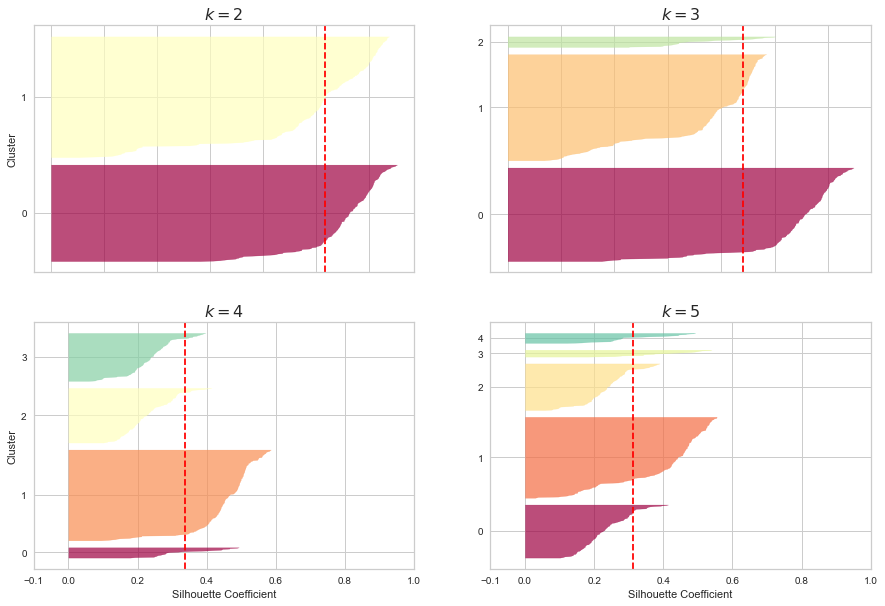

In [54]:
plt.figure(figsize=(15, 10))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(twod_data, y_pred)

    padding = len(twod_data) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

Berdasarkan hasil silhoutte score, credit risk segmentation dapat dibagi menjadi lima kelompok atau lima score. karena keterbatasan waktu dalam menganalisis, maka dipilih nilai k menjadi 2 bagian atau dengan kata lain pemberian nilai credit risk menjadi label 0 dan label 1.

setelah dilakukan pembuatan model clustering untuk credit risk segmentation, maka dilakukan indentifikasi analisis terhadap label 0 dan label 1 yang merupakan hasil pengelompokkan dari model kmeans clustering. pengindentifikasi ini bertujuan untuk menentukan customer dengan label yang mana yang memiliki resiko kredit lebih besar dan dapat merugikan perusahaan. selain itu, analisis ini dapat digunakan untuk memudahkan dalam menentukan customer baru atau nasabah baru dimasukkan kedalam label 0 atau label 1.

berdasarkan grafik credit amount terhadap credit risk terlihat bahwa distribusi jumlah kredit untuk label 0 lebih besar daripada label 1. hal ini dapat mengartikan bahwa customer atau nasbah dengan label 0 memiliki tagihan kredit lebih besar daripada customer atau nasabah dengan label 1. hal tersebut bisa berarti bahwa limit kredit customer atau nasabah dengan label 0 lebih besar daripada label 1 atau customer atau nasabah label 0  lebih loyal memakai kartu kredit daripada label 1. berdasarkan grafik tidak dapat disimpulkan bahwa label 0 itu good risk atau customer dengan resiko kredit yang kecil atau label 1 bad risk atau customer yang memiliki resiko kredit yang besar atau dengan kata lain customer yang cendrung melakukan tunggahkan pembayaran.

berdasarkan grafik durasi terhadap credit risk terlihat bahwa kebanyakkan customer dengan label 0 cendrung memilihan pembayaran kartu kredit dengan durasi lebih singkat daripada label 1. berdasarkan grafik ini juga dapat terlihat bahwa customer label 0 cendrung lebih loyal daripada label 1. akan tetapi, grafik tersebut juga menunjukkan bahwa baik customer atau nasabah dengan label 0 dan 1 memiliki distribusi data durasi pembayaran terhadap credit risk cendrung sama sehingga tidak dapat pengindentifikasi label 0 dan labe 1 berdasarkan grafik tersebut.

begitu juga dengan grafik housing dan jobs terhadap credit risk. baik customer atau nasabah dengan label 0 dan label 1 rata - rata memiliki pekerjaan dengan job level 2 (skilled) dan kebanyakkan customer atau nasabah yang memiliki tempat tinggal sendiri atau tidak sewa baik customer/nasabah dengan label 0 atau 1. hasil yang sama juga terlihat pada grafik age dan sex terhadap credit risk. hal ini mengartikan bahwa pengindentifikasi credit risk scoring tidak dapat dilihat dari data housing, job, age, maupun sex dari customer/nasabah.

berdasarkan grafik purposes terhadap credit risk dapat terlihat bahwa customer/nasabah dengan label 1 membeli barang - barang yang lebih mahal seperti mobil, saham, keperluan bisnis, dll dalam memngunakan kredit atau cicilan sedangkan label 0 membeli barang - barang yang cendrung lebih murah. Akan tetapi, grafik tersebut menginfokan bahwa label 1 cendrung membeli barang essential daripada label 0 meskipun frekuensi pembeli customer/nasabah label 1 lebih cendrung sedikit daripada customer/nasabah dengan label 0

Berdasarkan analisis tersebut dapat disimpulkan bahwa:
1. customer/nasabah label 1 merupakan customer/nasabah dengan good risk. hal ini dapat dilihat dari grafik purpose terhadap credit risk  bahwa customer/nasabah tersebut memiliki barang yang cukup mahal dan durasi cicilan yang lebih sedikit atau lebih singkat.
2. customer/nasabah label 0 merupakan customer/nasabah dengan bad risk.

untuk menguji model yang dibuat dapat digunakan untuk credit risk scoring terhadap data baru, maka model tersebut diuji pada data baru yang saya buat sendiri

berikut data baru yang digunakan untuk menguji keakuratan hasil dari model tersebut:

In [63]:
New_data = pd.DataFrame(np.array([[1, 23, 'female', 2, 'free', 'moderate', 'rich', 43, 12, 'car'], [2, 20, 'male', 2, 'rent', 'little', 'moderate', 72, 48, 'education']]),
                   columns=['No', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose'])
New_data

,No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,1,23,female,2,free,moderate,rich,43,12,car
1,2,20,male,2,rent,little,moderate,72,48,education


In [66]:
#Model Inference for 10 data random/sample

New_num = New_data[num_columns]
New_cat= New_data[cat_columns]

# feature scalling for data inference
inf_num_scaled = scaler.transform(New_num)
inf_num_scaled_ok = pd.DataFrame(inf_num_scaled).reset_index(drop=True)
inf_cat_encoded = encoder.transform(New_cat)
inf_cat_encoded_ok = pd.DataFrame(inf_cat_encoded).reset_index(drop=True)
inf_final = np.concatenate([inf_num_scaled, inf_cat_encoded], axis=1)
inf_final_df = pd.DataFrame(inf_final, columns=[num_columns+cat_columns])

inf_pca = pca_2d.transform(inf_final_df)
inf_pca_final = pd.DataFrame(inf_pca)

#predict price from data inference
pred_res = kmeans_new.predict(inf_pca_final)
cs_inf = pd.DataFrame(pred_res, columns=['Credit Risk (Predict)']).reset_index(drop=True)
cs_final = pd.concat([cs_inf, New_data], axis=1)
cs_final

,Credit Risk (Predict),No,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,1,1,23,female,2,free,moderate,rich,43,12,car
1,0,2,20,male,2,rent,little,moderate,72,48,education


Hal ini mengartikan bahwa model kmeans dapat digunakan dalam memberikan grading/score credit risk customer/nasabah. meskipun demikian, model kmean memiliki kelebihan dan kekurangan.

Kelebihan dari model kmeans tersebut sebagai berikut:
1. mudah untuk diimplementasikan dan dijalankan;
2. membutuhkan waktu relatif singkat;
3. mudah diadaptasi; serta
4. umum digunakan

dan kekurangan model algoritma kmeans sebagai berikut:
1. Sebelum algoritme dijalankan, k buah titik diinisialisasi secara acak sehingga pengklasteran data yang dihasilkan dapat berbeda-beda Jika nilai acak untuk inisialisasi kurang baik, hasil pengklasteran pun menjadi kurang optimal.
2. Algoritme ini dapat terjebak dalam masalah yang disebut curse of dimensionality (kutukan dimensi). Hal ini dapat terjadi jika data pelatihan memiliki dimensi yang sangat tinggi (jumlah dimensi adalah jumlah atribut sederhananya).
3. Jika hanya terdapat beberapa titik sampel data, cukup mudah untuk menghitung dan mencari titik terdekat dengan k titik yang diinisialisasi secara acak. Namun, jika terdapat banyak sekali titik data (misal satu miliar buah data), perhitungan dan pencarian titik terdekat akan membutuhkan waktu yang lama.

Walaupun hasil prediksi dari credit risk score/segmentation sudah cukup akurat, proyek ini masih bisa di improve sehingga mengahasilkan hasil yang lebih bagus. hal yang perlu di improve dari model tersebut:
1. menambah jumlah cluster atau menambah nilai k
2. melakukan pembersihan data dari outlier (nilai - nilai yang tidak masuk dalam range data)
3. menganti model yang menghasilkan tingkat keakuratan yang lebih tinggi.